# Introduction

Build a recommender system to identify top 5 recommended products for a user.

This project is deployed on https://sbprs-product-reco-manuel.herokuapp.com/
 

## High Level Steps to be followed
| **Step** | **Notebook** |
|---|---|
| **Data Acquisition** | Implemented in Current Notebook SBPRS_01_EDA_and_Recommendation |
| **Data Cleansing** | Implemented in Current Notebook SBPRS_01_EDA_and_Recommendation |
| **Basic EDA to understand the dataset** | Implemented in Current Notebook SBPRS_01_EDA_and_Recommendation |
| **Preprocessing if any** | Implemented in Current Notebook SBPRS_01_EDA_and_Recommendation |
| **Identify suitable Recommendation System** | Implemented in Current Notebook SBPRS_01_EDA_and_Recommendation |
| Identify suitable Classifier to predict sentiment | Implemented in next Notebook (SBPRS_02_Sentiment_Classifier) |
| Identify top 20 Recommended Product for each user based on similarity score | Implemented in next Notebook ( SBPRS_03_Consolidation ) |
| For each review , Calculate Percentage of Postive Sentiment | Implemented in next Notebook ( SBPRS_03_Consolidation ) |
| Pick 5 Products which has top Recommendation Percentage |Implemented in next Notebook ( SBPRS_03_Consolidation )  |


## Building a Recommender System

* User Based Colloborative Filtering 
    * Prediction
    * Evaluation
* Item Based Colloborative Filtering 
    * Prediction
    * Evaluation
* Choosing the best Recommender system
    * Saving matrix as pkl file



## Data Acquisition

### Importing necessary libraries

In [2]:
!pip install matplotlib

In [145]:
import pandas as pd
import numpy as np
import pickle
import os
import gzip

In [4]:
## pandas display option changes
pd.set_option('display.max_rows', 500)

In [5]:
base_cwd=os.getcwd()
file_path="..\\..\\SBPRS\\data\\raw\\sample30.csv"
raw_file_path = base_cwd+ "\\" +  file_path

In [6]:
## reading raw file into dataframe

#colab_path="/content/sample30.csv"
raw_dataset = pd.read_csv(raw_file_path)
#raw_dataset = pd.read_csv(colab_path)

### Column Analysis

In [7]:
raw_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,30000,271,AVpf3VOfilAPnD_xjpun,8545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand,30000,214,Clorox,10585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,30000,270,"Household Essentials,Cleaning Supplies,Kitchen...",8545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
manufacturer,29859,227,Clorox,8546,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,30000,271,Clorox Disinfecting Wipes Value Pack Scented 1...,8545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_date,29954,6857,2012-01-26T00:00:00.000Z,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_didPurchase,15932,2,False,14498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_doRecommend,27430,2,True,25880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews_rating,30000.0,NaN,NaN,NaN,4.483133,0.988441,1.0,4.0,5.0,5.0,5.0
reviews_text,30000,27282,Great,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
raw_dataset.isnull().sum(axis=0)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [9]:
print("No of Unique Brands       : " + str(len(raw_dataset.brand.value_counts()))) 
print("No of Unique categories    : " + str(len(raw_dataset.categories.value_counts()))) 
print("No of Unique manufacturer   : " + str(len(raw_dataset.manufacturer.value_counts()))) 
print("No of Unique Product name   : " + str(len(raw_dataset.name.value_counts()))) 
print("No of Unique Users   : " + str(len(raw_dataset.reviews_username.value_counts()))) 

print("No of Unique User Province   : " + str(len(raw_dataset.reviews_userProvince.value_counts()))) 
print("No of Unique User City   : " + str(len(raw_dataset.reviews_userCity.value_counts()))) 

No of Unique Brands       : 214
No of Unique categories    : 270
No of Unique manufacturer   : 227
No of Unique Product name   : 271
No of Unique Users   : 24914
No of Unique User Province   : 42
No of Unique User City   : 977


### Exploratory Data Analysis

#### Plot Top 30 Brands

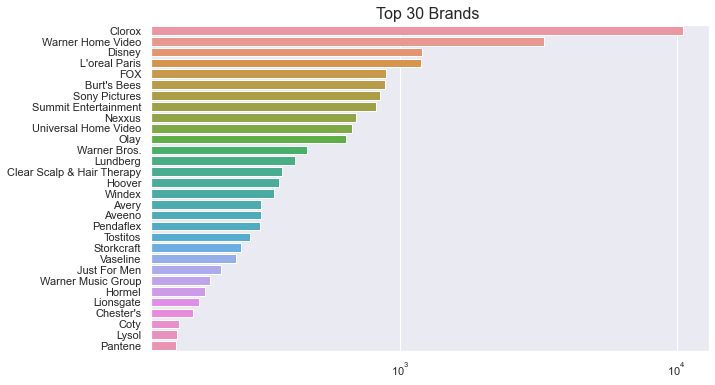

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,6)})

brand_top30 = raw_dataset.brand.value_counts()[:30]
ax = sns.barplot(y=brand_top30.index, x=brand_top30.values)
ax.set_xscale('log')
#ax.bar_label(ax.containers[0])

ax.set_title("Top 30 Brands ", fontsize=16)

plt.show()


#### Plot Top 30 Categories

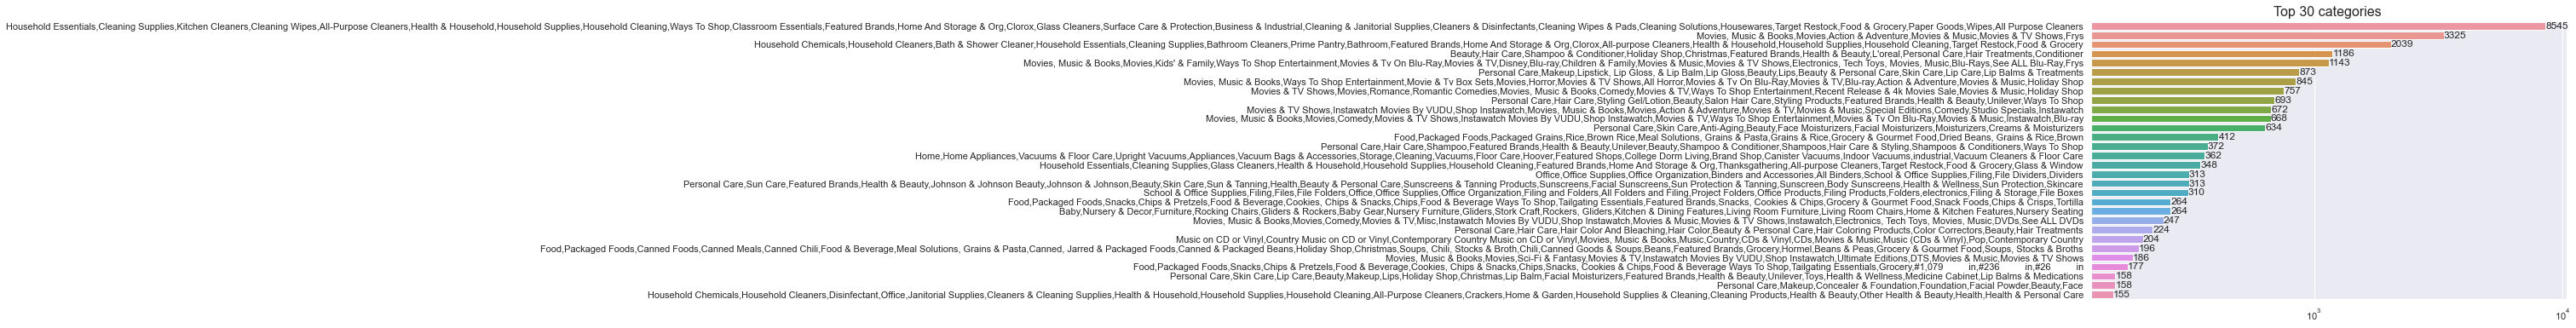

In [11]:
categories_top30 = raw_dataset.categories.value_counts()[:30]
ax = sns.barplot(y=categories_top30.index, x=categories_top30.values)
ax.set_xscale('log')
ax.bar_label(ax.containers[0])

ax.set_title("Top 30 categories ", fontsize=16)

plt.show()


#### Plot Top 30 Category ( Parent & End)

Since the Category field is large , we are unable to view it. Hence Picking up the First & Last Part in Category Hierarchy

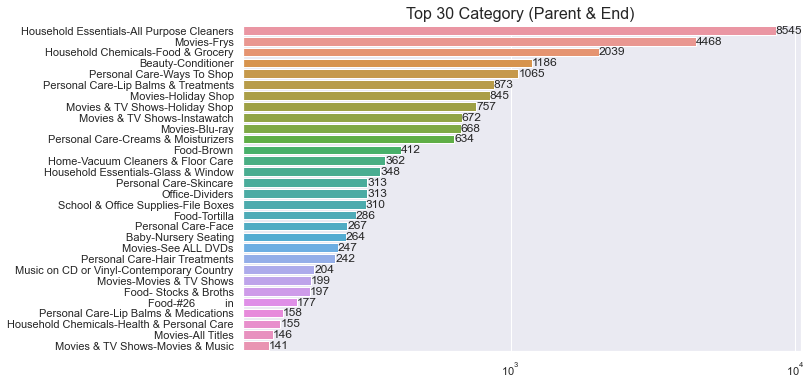

In [12]:
_df = raw_dataset.copy()
_df["cat_list"]= _df.categories.str.split(",").str[0] + "-"  + _df.categories.str.split(",").str[-1]

len(_df.cat_list.value_counts())

category_top30 = _df.cat_list.value_counts()[:30]
ax = sns.barplot(y=category_top30.index, x=category_top30.values)
ax.set_xscale('log')
ax.bar_label(ax.containers[0])

ax.set_title("Top 30 Category (Parent & End) ", fontsize=16)

plt.show()


#### Plot Top 30 Category ( Parent Only)

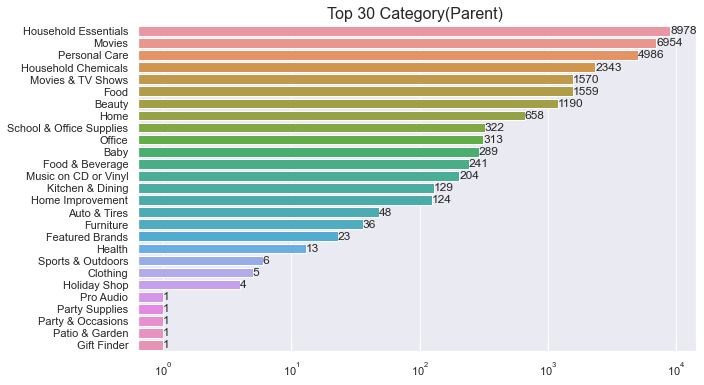

In [13]:
categories_top30 = raw_dataset.categories.str.split(",").str[0].value_counts()[:30]
ax = sns.barplot(y=categories_top30.index, x=categories_top30.values)
ax.set_xscale('log')
ax.bar_label(ax.containers[0])

ax.set_title("Top 30 Category(Parent) ", fontsize=16)

plt.show()

#### Plot Top 30 Manufacturers

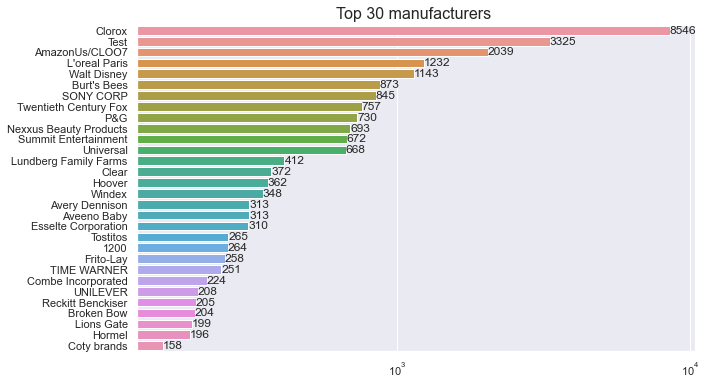

In [14]:
manufacturer_top30 = raw_dataset.manufacturer.value_counts()[:30]
ax = sns.barplot(y=manufacturer_top30.index, x=manufacturer_top30.values)
ax.set_xscale('log')
ax.bar_label(ax.containers[0])

ax.set_title("Top 30 manufacturers ", fontsize=16)

plt.show()

#### Count of Reviews during Purchasing / Not Purchased

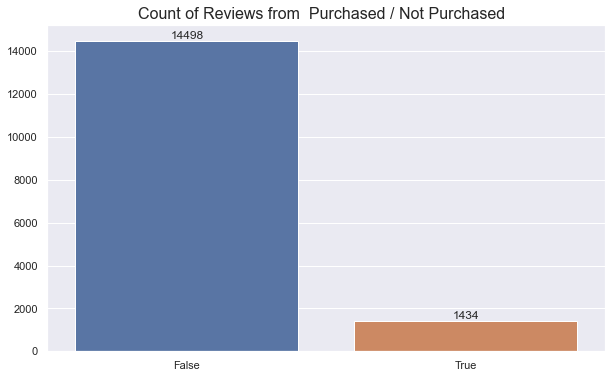

In [15]:
#reviews_didPurchase

rp_top30 = raw_dataset.reviews_didPurchase.value_counts()
ax = sns.barplot(x=rp_top30.index, y=rp_top30.values)
ax.bar_label(ax.containers[0])
ax.set_title("Count of Reviews from  Purchased / Not Purchased  ", fontsize=16)

plt.show()


#### Count of Positive / Negative Sentiment

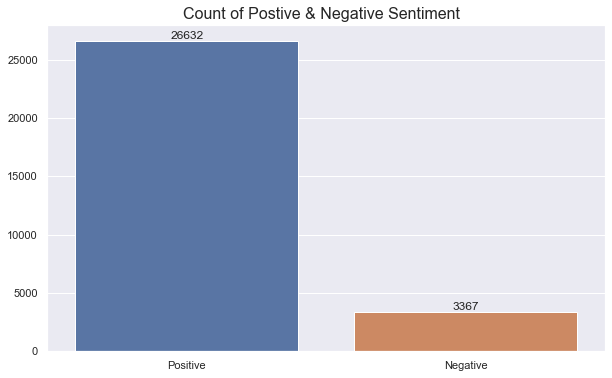

In [16]:
#user_sentiment

rp_top30 = raw_dataset.user_sentiment.value_counts()
ax = sns.barplot(x=rp_top30.index, y=rp_top30.values)
ax.bar_label(ax.containers[0])
ax.set_title("Count of Postive & Negative Sentiment  ", fontsize=16)

plt.show()

#### Count of Reviews based on Product Recommendataion  / Not Recommended

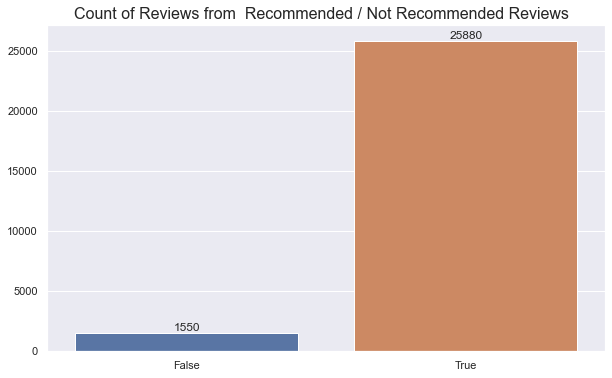

In [17]:
rp_top30 = raw_dataset.reviews_doRecommend.value_counts()
ax = sns.barplot(x=rp_top30.index, y=rp_top30.values)
ax.bar_label(ax.containers[0])
ax.set_title("Count of Reviews from  Recommended / Not Recommended Reviews  ", fontsize=16)

plt.show()

* No of Positive Sentiment Reviews is extremly higher than No of Negative Sentiment
* Need to fix the class imbalance before building the sentiment classifier model

#### Distribution  Reviews based on Ratings


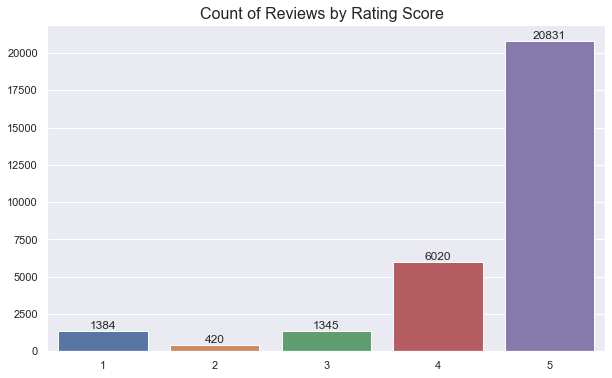

In [18]:
rp_top30 = raw_dataset.reviews_rating.value_counts()
ax = sns.barplot(x=rp_top30.index, y=rp_top30.values)
ax.bar_label(ax.containers[0])
ax.set_title("Count of Reviews by Rating Score  ", fontsize=16)

plt.show()

#raw_dataset.reviews_rating.value_counts()

#### Distribution of Brand,Category, Manufacturer, User name based on Review Sentiment & Rating


In [19]:
raw_dataset.groupby(['user_sentiment','reviews_rating']).count()[["brand", "categories","manufacturer", "name"]]

brand  categories  manufacturer   name
user_sentiment reviews_rating                                        
Negative       1                 597         597           596    597
               2                 140         140           140    140
               3                 220         220           216    220
               4                 550         550           539    550
               5                1860        1860          1852   1860
Positive       1                 787         787           786    787
               2                 280         280           278    280
               3                1125        1125          1112   1125
               4                5470        5470          5426   5470
               5               18970       18970         18913  18970

#### Distribution of Positive / Negative Sentiment over Ratings

In [20]:
_d = raw_dataset.pivot_table(index="reviews_rating", values="id", columns="user_sentiment", aggfunc='count')

Text(0.5, 0.98, 'Count of +ve/-ve review over Rating')

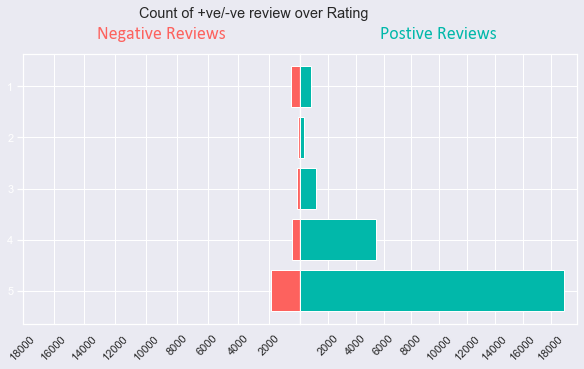

In [21]:
## Code Snippet from https://sharkcoder.com/data-visualization/mpl-bidirectional

font_color = '#525252'
hfont = {'fontname':'Calibri'}
facecolor = '#eaeaf2'
color_red = '#fd625e'
color_blue = '#01b8aa'
index = _d.index
column0 = _d['Negative']
column1 = _d['Positive']
title0 = 'Negative Reviews'
title1 = 'Postive Reviews'
    
    
fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
fig.tight_layout()

axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)

# If you have positive numbers and want to invert the x-axis of the left plot
axes[0].invert_xaxis() 

# To show data from highest to lowest
plt.gca().invert_yaxis()
     
axes[0].set(yticks=_d.index, yticklabels=_d.index)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='white') # tick color

axes[0].xaxis.set_tick_params(rotation=45)
axes[1].xaxis.set_tick_params(rotation=45)

axes[0].set_xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000,18000])
axes[1].set_xticks([2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000,18000])


plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.suptitle("Count of +ve/-ve review over Rating")



# Data Preprocessing 



## Review Findings
* Column `reviews_username` is empty for 63 records. Drop these rows
* Column `user_sentiment` is empty for 1 record. Can manually impute sentiment
* Column `reviews_userCity` is empty for over 90% rows. Drop this column 
* Column `reviews_userProvince` is empty for over 90% rows. Drop this column 
* Column `reviews_didPurchase` is empty for over 40% rows. Drop this column



### Eyeballing for inconsistent data.

* Few records have positive review text but has been marked as `Negative`
* Manually Reading through such records and marking it as `postive` in new column `updated_sentiment`
* Reading dataset from file `sample30_updated.csv`

In [22]:
base_cwd=os.getcwd()
file_path="..\\..\\SBPRS\\data\\raw\\sample30_updated.csv"
raw_file_path = base_cwd+ "\\" +  file_path
## reading raw file into dataframe
#colab_path="/content/sample30_updated.csv"
#new_dataset = pd.read_csv(colab_path)
new_dataset = pd.read_csv(raw_file_path)


### Displaying inconsistent review_text/review_sentiment data

In [23]:
new_dataset[new_dataset.user_sentiment !=new_dataset.updated_sentiment][["user_sentiment","updated_sentiment","reviews_text"]]

,user_sentiment,updated_sentiment,reviews_text
83,Negative,Positive,I would recommend this product to those who do...
166,Negative,Positive,This product is really helpful for dry rough s...
671,Negative,Positive,I've been using this product for a number of y...
814,Negative,Positive,I've used this for years and usually go back t...
831,Negative,Positive,Have tried other less expensive choices and al...
922,Negative,Positive,I like to have bulk items like this delivered ...
978,Negative,Positive,would recommend
1030,Negative,Positive,There is a reason this product has been around...
1294,Negative,Positive,Used it for ever works well
1417,Negative,Positive,Product works wonders on my curly hair! I'd re...


### Data Cleanup

In [24]:
cleansed_dataset= new_dataset.copy()

#### Impute sentiment for missing row

In [25]:
cleansed_dataset[cleansed_dataset.user_sentiment.isnull()]["reviews_text"]

28354    my kids absolutely loved this film so much tha...
Name: reviews_text, dtype: object

In [26]:
cleansed_dataset.loc[cleansed_dataset.user_sentiment.isnull(),"user_sentiment"] = "Positive"
cleansed_dataset.loc[cleansed_dataset.user_sentiment.isnull(),"updated_sentiment"] = "Positive"

#### Drop rows with no username

In [27]:
cleansed_dataset.drop(cleansed_dataset[cleansed_dataset.reviews_username.isnull()].index,inplace=True)

In [28]:
cleansed_dataset.shape

(29937, 16)

In [29]:
cleansed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29937 non-null  object
 1   brand                 29937 non-null  object
 2   categories            29937 non-null  object
 3   manufacturer          29796 non-null  object
 4   name                  29937 non-null  object
 5   reviews_date          29897 non-null  object
 6   reviews_didPurchase   15931 non-null  object
 7   reviews_doRecommend   27396 non-null  object
 8   reviews_rating        29937 non-null  int64 
 9   reviews_text          29937 non-null  object
 10  reviews_title         29748 non-null  object
 11  reviews_userCity      1900 non-null   object
 12  reviews_userProvince  167 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29937 non-null  object
 15  updated_sentiment     29936 non-null

### Retain necessary columns

In [30]:
cleansed_dataset = cleansed_dataset[["id","name","reviews_username", "reviews_text","reviews_title","updated_sentiment","reviews_rating"]]

In [31]:
cleansed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 29937 non-null  object
 1   name               29937 non-null  object
 2   reviews_username   29937 non-null  object
 3   reviews_text       29937 non-null  object
 4   reviews_title      29748 non-null  object
 5   updated_sentiment  29936 non-null  object
 6   reviews_rating     29937 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


In [32]:
cleansed_dataset.shape

(29937, 7)

# Building Recommendation System

## Reviewing dataset

In [33]:
cleansed_dataset.head()

,id,name,reviews_username,reviews_text,reviews_title,updated_sentiment,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,i love this album. it's very good. more to the...,Just Awesome,Positive,5
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor. This review was collected as part...,Good,Positive,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor.,Good,Positive,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,rebecca,I read through the reviews on here before look...,Disappointed,Negative,1
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,walker557,My husband bought this gel for us. The gel cau...,Irritation,Negative,1


In [34]:
cleansed_dataset[["updated_sentiment","reviews_rating"]].value_counts()

updated_sentiment  reviews_rating
Positive           5                 19026
                   4                  5498
Negative           5                  1765
Positive           3                  1130
                   1                   780
Negative           1                   593
                   4                   512
Positive           2                   278
Negative           3                   214
                   2                   140
dtype: int64

### Marking negative sentiment ratings as zero

In [35]:
cleansed_dataset["normalised_rating"] = cleansed_dataset["reviews_rating"] * cleansed_dataset["updated_sentiment"].map(lambda x : 1 if x == "Positive" else 0)

In [36]:
cleansed_dataset.head()

,id,name,reviews_username,reviews_text,reviews_title,updated_sentiment,reviews_rating,normalised_rating
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),joshua,i love this album. it's very good. more to the...,Just Awesome,Positive,5,5
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor. This review was collected as part...,Good,Positive,5,5
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,dorothy w,Good flavor.,Good,Positive,5,5
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,rebecca,I read through the reviews on here before look...,Disappointed,Negative,1,0
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,walker557,My husband bought this gel for us. The gel cau...,Irritation,Negative,1,0


## Building User Based Colloborative Filtering

### Building User-Item Matrix

In [37]:
_d_multiplereview = cleansed_dataset.groupby(["reviews_username","name"]).size().sort_values(ascending=False).reset_index(name='count') 


In [38]:
_d_multiplereview[_d_multiplereview["count"]>2]

,reviews_username,name,count
0,byamazon customer,Aveeno Baby Continuous Protection Lotion Sunsc...,22
1,byamazon customer,"Lundberg Wehani Rice, 25lb",19
2,mike,Godzilla 3d Includes Digital Copy Ultraviolet ...,15
3,chris,Godzilla 3d Includes Digital Copy Ultraviolet ...,9
4,thomas,Godzilla 3d Includes Digital Copy Ultraviolet ...,7
5,movielover,Godzilla 3d Includes Digital Copy Ultraviolet ...,7
6,scott,Godzilla 3d Includes Digital Copy Ultraviolet ...,6
7,matt,Godzilla 3d Includes Digital Copy Ultraviolet ...,6
8,dusty,Planes: Fire Rescue (2 Discs) (includes Digita...,5
9,josh,Godzilla 3d Includes Digital Copy Ultraviolet ...,5


User has reviewed same product multiple times. Hence picking the rating which has occured maximum occurance using mode

In [39]:
import statistics
from scipy import stats

cleansed_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc=statistics.mode)
#cleansed_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating")

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zxjki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zyiah4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Split into Train/Test Dataset

In [40]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(cleansed_dataset, test_size=0.3 , random_state=14)

In [41]:
print(train.shape)
print(test.shape)

(20955, 8)
(8982, 8)


### Build User-Item matrix using training data

In [42]:
user_item_ratings=train.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc=statistics.mode)
#user_item_ratings=train.pivot_table(index="reviews_username", columns="name",values="normalised_rating")

##### Probing data to understand insights

In [43]:
user_item_ratings[ ~user_item_ratings.iloc[:,3].isnull() ]

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
bethesda1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbyers,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kaida,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
red77,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thatkimber,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
user_item_ratings.sum(axis=0).sort_values(ascending=False)

name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                                  24388.0
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                             8945.0
Clorox Disinfecting Bathroom Cleaner                                                                        6006.0
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                                         3431.0
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                              2578.0
Burt's Bees Lip Shimmer, Raisin                                                                             2548.0
The Resident Evil Collection 5 Discs (blu-Ray)                                                              2151.0
Red (special Edition) (dvdvideo)                                                                            2019.0
Mike Dave Need Wedding Dates (dvd + Digital)                               

In [45]:
user_item_ratings.fillna(0, inplace=True)

In [46]:
user_item_ratings[user_item_ratings["Burt's Bees Lip Shimmer, Raisin"] != 0]["Burt's Bees Lip Shimmer, Raisin"]

reviews_username
17roses        4.0
1cocoafan      5.0
2016           5.0
20crafter16    5.0
2iceskates     5.0
              ... 
yogamom        4.0
yooper         5.0
ziana          5.0
zookeeper      5.0
zsazsa         5.0
Name: Burt's Bees Lip Shimmer, Raisin, Length: 543, dtype: float64

### Creating dummy dataset for train

* Dummy train - Predict rating for products which have not been reviewed by the user. To ignore the products reviewed by the user, mark those ratings as 0. The products not reviwewd by user are marked as 1.

* Dummy test - Used for evaluation. To evaluate, we will predict ratings for products already reviewed by the user. So, this is marked as 1. This is the opposite of dummy train

In [47]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [48]:
# The Items not bought by user is marked as 1 for prediction. 
dummy_train['normalised_rating'] = dummy_train['normalised_rating'].apply(lambda x: 0 if x!=0 else 1)

In [49]:
dummy_train['normalised_rating']

24749    0
2244     0
5050     0
15229    0
16326    0
        ..
22907    1
18885    0
9526     0
13698    0
19098    1
Name: normalised_rating, Length: 20955, dtype: int64

In [50]:
dummy_train= dummy_train.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").fillna(1)

In [51]:
dummy_train

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zulaa118,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Calculate Cosine Similarity

In [52]:
from sklearn.metrics.pairwise import pairwise_distances
pairwise_distances(user_item_ratings, metric='cosine')
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(user_item_ratings, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.        0.        0.        ... 0.        0.        0.       ]
 [0.        1.        0.        ... 0.        0.9486833 0.       ]
 [0.        0.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        0.       ]
 [0.        0.9486833 0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 0.        0.        1.       ]]


In [53]:
mean = np.nanmean(user_item_ratings, axis=1)
df_subtracted = (user_item_ratings.T-mean).T

In [54]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,...,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194
00sab00,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,...,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194
01impala,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,...,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146,-0.012146
02deuce,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,...,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194,-0.016194
0325home,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,...,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243,-0.020243


### Find Cosine Similarity

In [55]:
from sklearn.metrics.pairwise import pairwise_distances

In [56]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.         -0.0051482  -0.00406504 ... -0.00406504 -0.00406504
  -0.00406504]
 [-0.0051482   1.         -0.0051482  ... -0.0051482   0.9485553
  -0.0051482 ]
 [-0.00406504 -0.0051482   1.         ... -0.00406504 -0.00406504
  -0.00406504]
 ...
 [-0.00406504 -0.0051482  -0.00406504 ...  1.         -0.00406504
  -0.00406504]
 [-0.00406504  0.9485553  -0.00406504 ... -0.00406504  1.
  -0.00406504]
 [-0.00406504 -0.0051482  -0.00406504 ... -0.00406504 -0.00406504
   1.        ]]


### USing Adjusted Cosine


In [57]:
# Create a user-movie matrix.
df_pivot = train.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean")

In [58]:
df_pivot

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zulaa118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zuttle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [59]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [60]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Prediction


In [61]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 0.       , ..., 0.       , 0.9485553,
        0.       ],
       [0.       , 0.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        0.       ],
       [0.       , 0.9485553, 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        1.       ]])

In [62]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[ 0.        ,  0.        ,  0.        , ...,  1.63934241,
         0.        ,  0.        ],
       [ 0.        ,  0.87668797,  0.        , ...,  9.864548  ,
         3.34224791,  1.18529267],
       [ 0.        , 25.84411185,  0.        , ..., 12.39755834,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  6.3129514 ,  0.        , ...,  7.18825197,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  8.68125619,
         3.52834054,  1.26443532],
       [ 0.        ,  7.67543475,  0.        , ...,  2.15781132,
         0.        ,  0.        ]])

In [63]:
user_predicted_ratings.shape

(18244, 247)

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero. 

In [64]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.453659,0.00000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.639342,0.000000,0.000000
00sab00,0.0,0.876688,0.0,0.0,0.0,0.0,0.0,3.304178,0.00000,1.959046,...,2.321682,0.0,0.0,1.229499,0.0,0.0,0.0,9.864548,3.342248,1.185293
01impala,0.0,25.844112,0.0,0.0,0.0,0.0,0.0,5.318024,0.00000,0.000000,...,5.276332,0.0,0.0,2.217964,0.0,0.0,0.0,12.397558,0.000000,0.000000
02deuce,0.0,25.844112,0.0,0.0,0.0,0.0,0.0,5.318024,0.00000,0.000000,...,5.276332,0.0,0.0,2.217964,0.0,0.0,0.0,12.397558,0.000000,0.000000
0325home,0.0,7.675435,0.0,0.0,0.0,0.0,0.0,0.000000,2.60665,0.000000,...,0.000000,0.0,0.0,3.528341,0.0,0.0,0.0,2.157811,0.000000,0.000000


### Finding the top 5 recommendation for the *user*

In [65]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name1085
1085


In [66]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
d

name
Mike Dave Need Wedding Dates (dvd + Digital)                                       66.343974
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    53.386888
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                          35.069414
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                33.059021
The Resident Evil Collection 5 Discs (blu-Ray)                                     20.375657
Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo)                      13.693665
Red (special Edition) (dvdvideo)                                                   11.835503
Clorox Disinfecting Bathroom Cleaner                                               11.683854
Chester's Cheese Flavored Puffcorn Snacks                                           9.629848
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                        9.622179
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)            

### Evaluating User-User 

In [67]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2023, 8)

In [68]:
common.head()

,id,name,reviews_username,reviews_text,reviews_title,updated_sentiment,reviews_rating,normalised_rating
19469,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,sls974,convenient and effective...great product! Betw...,great product,Positive,5,5
2992,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,chief,Good funny movie. Great to stay in and enjoy w...,Good movie,Positive,5,5
2717,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,cougar,This was a good movie not as good as the first...,Good Movie,Positive,4,4
2288,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),sheila,This movie lived up to the hilarious previews ...,Hilarious,Positive,5,5
20975,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,jenny,Try with homemade Mexican dip. They really hol...,stood up to my homemade layered dip,Positive,5,5


In [69]:
# convert into the user-movie matrix.
common_user_based_matrix = common.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean")

In [70]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [71]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18234,18235,18236,18237,18238,18239,18240,18241,18242,18243
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.948555,0.0,0.0,0.000000,...,0.0,0.312753,0.0,0.0,0.0,0.0,0.0,0.0,0.948555,0.0
01impala,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.574999,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
02deuce,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.574999,...,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.574999,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0


In [73]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [74]:
user_correlation_df_1.shape

(1703, 18244)

In [75]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [76]:
user_correlation_df_3 = user_correlation_df_2.T

In [77]:
user_correlation_df_3.head()

,1234,1234567,143st,1witch,23jen,4 rooms 1 dog lotsa fur,4cloroxl,4djs,50cal,7.87E+11,...,yellow,yesseniaw22,yeya,yohnie1,yorkielvr,yshan,yummy,zapman,zburt5,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.574999,0.0,0.0,0.574999,0.0,0.574999,0.574999,0.0,0.0,...,0.574999,0.0,0.574999,0.402405,0.574999,0.0,0.0,0.0,0.0,0.574999
1234567,0.574999,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,1.000000,0.705668,1.000000,0.0,0.0,0.0,0.0,1.000000
143st,0.000000,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
1witch,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
23jen,0.574999,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,...,1.000000,0.0,1.000000,0.705668,1.000000,0.0,0.0,0.0,0.0,1.000000


In [78]:
user_correlation_df_3.shape

(1703, 1703)

### Predicting User-User

In [79]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 0.        ,  3.11511153,  0.        , ..., 13.06785938,
         1.18961683,  2.29999411],
       [ 0.        ,  0.        ,  0.        , ...,  7.02039064,
         0.        ,  0.        ],
       [ 0.        ,  2.48470934,  0.        , ...,  5.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 27.87499264,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  7.02039064,
         0.        ,  0.        ]])

In [80]:
dummy_test = common.copy()

dummy_test['normalised_rating'] = dummy_test['normalised_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").fillna(0)

In [81]:
dummy_test

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",...,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Country's Greatest Gospel:Gold Ed (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23jen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yshan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zapman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [82]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [83]:
common_user_predicted_ratings.head(2)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),"42 Dual Drop Leaf Table with 2 Madrid Chairs""",Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",...,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Country's Greatest Gospel:Gold Ed (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [84]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  5. nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\dmanue11\AppData\Local\Continuum\anaconda3\envs\py3810pip\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\dmanue11\AppData\Local\Continuum\anaconda3\envs\py3810pip\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [85]:
common_ = common.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean")

In [86]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [87]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.035456811513005


## Building Item Based Colloborative Filtering

### Building User-Item Matrix

In [88]:
_ib_d_multiplereview = cleansed_dataset.groupby(["reviews_username","name"]).size().sort_values(ascending=False).reset_index(name='count') 


In [89]:
_ib_d_multiplereview[_ib_d_multiplereview["count"]>2]

,reviews_username,name,count
0,byamazon customer,Aveeno Baby Continuous Protection Lotion Sunsc...,22
1,byamazon customer,"Lundberg Wehani Rice, 25lb",19
2,mike,Godzilla 3d Includes Digital Copy Ultraviolet ...,15
3,chris,Godzilla 3d Includes Digital Copy Ultraviolet ...,9
4,thomas,Godzilla 3d Includes Digital Copy Ultraviolet ...,7
5,movielover,Godzilla 3d Includes Digital Copy Ultraviolet ...,7
6,scott,Godzilla 3d Includes Digital Copy Ultraviolet ...,6
7,matt,Godzilla 3d Includes Digital Copy Ultraviolet ...,6
8,dusty,Planes: Fire Rescue (2 Discs) (includes Digita...,5
9,josh,Godzilla 3d Includes Digital Copy Ultraviolet ...,5


User has reviewed same product multiple times. Hence picking the rating which has occured maximum occurance using mode

In [90]:
import statistics

cleansed_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc=statistics.mode).T
#cleansed_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating").T

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,...,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5302050 15/16 FCT/HOSE ADAPTOR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa's Best No-Lye Dual Conditioning Relaxer System Super,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Split into Train/Test Dataset

In [91]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(cleansed_dataset, test_size=0.3 , random_state=14)

In [92]:
print(train.shape)
print(test.shape)

(20955, 8)
(8982, 8)


### Build User-Item matrix using training data

In [93]:
ib_user_item_ratings=train.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc=statistics.mode).T
#ib_user_item_ratings=train.pivot_table(index="reviews_username", columns="name",values="normalised_rating" ).T

##### Probing data to understand insights

In [94]:
ib_user_item_ratings[ ~ib_user_item_ratings.iloc[:,3].isnull() ]

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,08dallas,1085,10ten,11677j,1234,...,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [95]:
ib_user_item_ratings.sum(axis=0).sort_values(ascending=False)

reviews_username
chris        49.0
sandy        45.0
lisa         43.0
jenn         43.0
mike         42.0
             ... 
gordy313      0.0
gordon24      0.0
skstock04     0.0
skwr          0.0
kenred007     0.0
Length: 18244, dtype: float64

In [96]:
ib_user_item_ratings.fillna(0, inplace=True)

### Creating dummy dataset for train

* Dummy train - Predict rating for products which have not been reviewed by the user. To ignore the products reviewed by the user, mark those ratings as 0. The products not reviwewd by user are marked as 1.

* Dummy test - Used for evaluation. To evaluate, we will predict ratings for products already reviewed by the user. So, this is marked as 1. This is the opposite of dummy train

In [97]:
# Copy the train dataset into dummy_train
ib_dummy_train = train.copy()

In [98]:
# The Items not bought by user is marked as 1 for prediction. 
ib_dummy_train['normalised_rating'] = ib_dummy_train['normalised_rating'].apply(lambda x: 0 if x!=0 else 1)

In [99]:
ib_dummy_train['normalised_rating']

24749    0
2244     0
5050     0
15229    0
16326    0
        ..
22907    1
18885    0
9526     0
13698    0
19098    1
Name: normalised_rating, Length: 20955, dtype: int64

In [100]:
ib_dummy_train= ib_dummy_train.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").fillna(1).T

In [101]:
ib_dummy_train

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,08dallas,1085,10ten,11677j,1234,...,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Alex Cross (dvdvideo),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"All,bran Complete Wheat Flakes, 18 Oz.",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Calculate Cosine Similarity

In [102]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
ib_user_correlation = 1 - pairwise_distances(ib_user_item_ratings, metric='cosine')
ib_user_correlation[np.isnan(ib_user_correlation)] = 0
print(ib_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [103]:
ib_mean = np.nanmean(ib_user_item_ratings, axis=1)
ib_df_subtracted = (ib_user_item_ratings.T-ib_mean).T

In [104]:
ib_df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,08dallas,1085,10ten,11677j,1234,...,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,...,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274
100:Complete First Season (blu-Ray),-0.026200,-0.026200,-0.026200,-0.026200,-0.026200,4.973800,-0.026200,-0.026200,-0.026200,-0.026200,...,-0.026200,-0.026200,-0.026200,-0.026200,-0.026200,-0.026200,-0.026200,-0.026200,-0.026200,-0.026200
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"2x Ultra Era with Oxi Booster, 50fl oz",-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,...,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316,-0.001316
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,...,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274,-0.000274


### Find Cosine Similarity

In [105]:
from sklearn.metrics.pairwise import pairwise_distances

In [106]:
# Creating the User Similarity Matrix using pairwise_distance function.
item_correlation = 1 - pairwise_distances(ib_df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00 -5.47346139e-04  0.00000000e+00 ... -7.19690814e-04
  -3.52029506e-04 -2.52763672e-04]
 [-5.47346139e-04  1.00000000e+00  0.00000000e+00 ... -7.18628236e-03
  -3.51509756e-03 -2.52390482e-03]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-7.19690814e-04 -7.18628236e-03  0.00000000e+00 ...  1.00000000e+00
  -4.62190786e-03 -3.31861501e-03]
 [-3.52029506e-04 -3.51509756e-03  0.00000000e+00 ... -4.62190786e-03
   1.00000000e+00 -1.62326708e-03]
 [-2.52763672e-04 -2.52390482e-03  0.00000000e+00 ... -3.31861501e-03
  -1.62326708e-03  1.00000000e+00]]


### USing Adjusted Cosine


In [107]:
# Create a user-movie matrix.
ib_df_pivot = train.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").T

In [108]:
ib_df_pivot

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,08dallas,1085,10ten,11677j,1234,...,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa's Best No-Lye Dual Conditioning Relaxer System Super,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex Cross (dvdvideo),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"All,bran Complete Wheat Flakes, 18 Oz.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the movie for each user around 0 mean

In [109]:
ib_mean = np.nanmean(ib_df_pivot, axis=1)
ib_df_subtracted = (ib_df_pivot.T-ib_mean).T

In [110]:
ib_df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,08dallas,1085,10ten,11677j,1234,...,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.53271,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Prediction


In [111]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [112]:
item_predicted_ratings = np.dot(ib_df_pivot.fillna(0).T,item_correlation )
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.06864486, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00329215,
        0.0066748 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00548691,
        0.01112467],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [113]:
item_predicted_ratings.shape

(18244, 247)

Since we are interested only in the movies not rated by the user, we will ignore the movies rated by the user by making it zero. 

In [114]:
item_final_rating = np.multiply(item_predicted_ratings,ib_dummy_train.T)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092777,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.068645,0.000000,0.000000
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008825,0.0,0.071745,...,0.104448,0.0,0.0,0.029854,0.0,0.0,0.0,0.000000,0.003292,0.006675
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.086775,0.0,0.0,0.012588,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.115699,0.0,0.0,0.016784,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


### Finding the top 5 recommendation for the *user*

In [115]:
# Take the user ID as input.
user_input = input("Enter your user name")
print(user_input)

Enter your user name1085
1085


In [116]:
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
d

name
D-Con Mice Bait Station - 3ct                                  0.187804
Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan    0.177787
SC Johnson One Step No Buff Wax                                0.177787
Wagan Smartac 80watt Inverter With Usb                         0.174079
Mike Dave Need Wedding Dates (dvd + Digital)                   0.143236
Name: 1085, dtype: float64

### Evaluating item-item 

In [117]:
# Find out the common users of test and train dataset.
common = test[test.name.isin(train.name)]
common.shape

(8956, 8)

In [118]:
common.head()

,id,name,reviews_username,reviews_text,reviews_title,updated_sentiment,reviews_rating,normalised_rating
1682,AVpe31o71cnluZ0-YrSD,Dark Shadows (includes Digital Copy) (ultravio...,trickylane,Many reasons to buy this 1. Tim Burton movie 2...,Dark Shadows,Positive,5,5
20233,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,mariosmama,I have three men living with me from the ages ...,Perfect!!!!!!!!!!,Positive,5,5
19844,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,catwoman,"I keep these in the kitchen, bathroom, and at ...",Amazing!,Negative,5,0
15324,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,sueh1000,Our department uses these for student retreat ...,Great product,Positive,5,5
14380,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,mmcdaniel,They are great. Clean well and disinfect. Easy...,Love These Wipes,Positive,5,5


In [119]:
# convert into the user-movie matrix.
common_item_based_matrix = common.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").T

In [120]:
# Convert the user_correlation matrix into dataframe.
item_correlation_df = pd.DataFrame(item_correlation)

In [121]:
ib_df_subtracted

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,08dallas,1085,10ten,11677j,1234,...,zozo0o,zpalma,zsarah,zsazsa,zt313,zubb,zulaa118,zuttle,zzdiane,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.53271,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa's Best No-Lye Dual Conditioning Relaxer System Super,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alex Cross (dvdvideo),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"All,bran Complete Wheat Flakes, 18 Oz.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
item_correlation_df['name'] = ib_df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
item_correlation_df[item_correlation_df.index.isin(list_name)]

,0,1,2,3,4,5,6,7,8,9,...,237,238,239,240,241,242,243,244,245,246
name,,,,,,,,,,,,,,,,,,,,,


In [124]:
item_list_name = common.name.tolist()

item_correlation_df.columns = ib_df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(item_list_name)]

In [125]:
item_correlation_df_1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
100:Complete First Season (blu-Ray),0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
Alex Cross (dvdvideo),0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.004038,0.000000,0.000000
"All,bran Complete Wheat Flakes, 18 Oz.",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
Ambi Complexion Cleansing Bar,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [126]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(item_list_name)]

In [127]:
item_correlation_df_3 = item_correlation_df_2.T

In [128]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
item_correlation_df_3.shape

(203, 203)

### Predicting Item-Item

In [130]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
dummy_test = common.copy()

dummy_test['normalised_rating'] = dummy_test['normalised_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").fillna(0).T

In [132]:
dummy_test

reviews_username,02dakota,06stidriver,09mommy11,1.11E+24,11111111aaaaaaaaaaaaaaaaa,1143mom,1234,1234567,123cat123,123numbers,...,zodness,zoeellasca,zokhid,zombie,zombiekiller14,zowie,zwithanx,zxcsdfd,zxjki,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alex Cross (dvdvideo),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"All,bran Complete Wheat Flakes, 18 Oz.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ambi Complexion Cleansing Bar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [134]:
common_item_predicted_ratings.head(2)

reviews_username,02dakota,06stidriver,09mommy11,1.11E+24,11111111aaaaaaaaaaaaaaaaa,1143mom,1234,1234567,123cat123,123numbers,...,zodness,zoeellasca,zokhid,zombie,zombiekiller14,zowie,zwithanx,zxcsdfd,zxjki,zyiah4
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.

In [135]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\dmanue11\AppData\Local\Continuum\anaconda3\envs\py3810pip\lib\site-packages\sklearn\preprocessing\_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\dmanue11\AppData\Local\Continuum\anaconda3\envs\py3810pip\lib\site-packages\sklearn\preprocessing\_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [136]:
item_common_ = common.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").T

In [137]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [138]:
rmse = (sum(sum((item_common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.614277986684318


# Recommendation System - Conclusion

* User Based Recommendation has lower RMSE then Item Based Recommendation.
* We will use User Based Colloborative Filtering Model 

## Recalcuate the User Based Colloborative Filtering Model for entire dataset

In [139]:
final_dataset = cleansed_dataset.copy()

#full_user_item_ratings=final_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc=statistics.mode)
full_user_item_ratings=final_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating")
full_user_item_ratings.fillna(0, inplace=True)

dummy_final_dataset = final_dataset.copy()
dummy_final_dataset['normalised_rating'] = dummy_final_dataset['normalised_rating'].apply(lambda x: 0 if x!=0 else 1)
dummy_final_dataset= dummy_final_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean").fillna(1)


mean = np.nanmean(full_user_item_ratings, axis=1)
df_final_subtracted = (full_user_item_ratings.T-mean).T

# Creating the User Similarity Matrix using pairwise_distance function.
full_user_correlation = 1 - pairwise_distances(df_final_subtracted.fillna(0), metric='cosine')
full_user_correlation[np.isnan(full_user_correlation)] = 0

df_full_pivot = final_dataset.pivot_table(index="reviews_username", columns="name",values="normalised_rating", aggfunc="mean")

full_user_correlation[full_user_correlation<0]=0
full_user_predicted_ratings = np.dot(full_user_correlation, df_full_pivot.fillna(0))
full_user_final_rating = np.multiply(full_user_predicted_ratings,dummy_final_dataset)


In [140]:
#full_user_final_rating.shape

In [141]:
full_user_final_rating.loc["joshua"].sort_values(ascending=False)[0:20]


name
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                    51.407352
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                18.112790
The Resident Evil Collection 5 Discs (blu-Ray)                                     17.938384
Mike Dave Need Wedding Dates (dvd + Digital)                                       17.613673
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                               14.871014
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                           9.415473
100:Complete First Season (blu-Ray)                                                 6.169150
Hormel Chili, No Beans                                                              6.038311
Windex Original Glass Cleaner Refill 67.6oz (2 Liter)                               5.961244
Tostitos Bite Size Tortilla Chips                                                   5.885409
Chester's Cheese Flavored Puffcorn Snacks                        

In [142]:
#full_user_final_rating.to_pickle("..\\models\\full_user_final_rating.pkl")

In [143]:
cleansed_dataset.to_pickle("..\\models\\cleansed_dataset.pkl")

In [146]:
# writing into file. This will take long time
fp = gzip.open('..\\models\\full_user_final_rating.data','wb')
pickle.dump(full_user_final_rating,fp)
fp.close()


## Conclusion - Part A

* User Based Recommendation Matrix & Cleansed Dataset are pickled for further use
* In Next Notebook, Sentiment Classifier would be build on Colab Platform since my desktop has limited computational Power

